In [95]:
# Importing requirements

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [97]:
# Loading dataset

df = pd.read_csv("data.csv")

In [99]:
df.head(5)

,hsi_id,0,1,2,3,4,5,6,7,8,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
0,imagoai_corn_0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,...,0.710280,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520,1100.0
1,imagoai_corn_1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,...,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054,1000.0
2,imagoai_corn_2,0.389023,0.371206,0.373098,0.373872,0.361056,0.349709,0.333882,0.330841,0.328925,...,0.683054,0.669286,0.663179,0.676165,0.676591,0.655951,0.658945,0.670989,0.665176,1300.0
3,imagoai_corn_3,0.468837,0.473255,0.462949,0.459335,0.461672,0.459824,0.458194,0.427737,0.415360,...,0.742782,0.730801,0.736787,0.730044,0.751437,0.738497,0.742446,0.754657,0.733474,1300.0
4,imagoai_corn_4,0.483352,0.487274,0.469153,0.487648,0.464026,0.451152,0.458229,0.440782,0.426193,...,0.770227,0.773013,0.761431,0.763488,0.762473,0.744012,0.775486,0.760431,0.751988,220.0


In [101]:
df.info()
#*********************************
# object : hsi_id  ; rest are float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 450 entries, hsi_id to vomitoxin_ppb
dtypes: float64(449), object(1)
memory usage: 1.7+ MB


In [103]:
#**************************
# train test split

X = df.drop(columns = ["hsi_id", "vomitoxin_ppb"])
y = df["vomitoxin_ppb"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

print(f"Train size {X_train.shape}")
print(f"Test size {X_test.shape}")

Train size (400, 448)
Test size (100, 448)


## Missing values

In [106]:
#*****************************
# No column has Missing values in X_train 
X_train.isna().any().value_counts()

False    448
Name: count, dtype: int64

In [108]:
#*****************************
# No column has Missing values in X_test 
X_test.isna().any().value_counts()

False    448
Name: count, dtype: int64

In [110]:
#*****************************
# No column has Missing values in y_train 
y_train.isna().any()

False

In [112]:
#*****************************
# No column has Missing values in y_test 
y_train.isna().any()

False

## Handling OUTLIERS

In [115]:
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,438,439,440,441,442,443,444,445,446,447
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.444834,0.442510,0.435550,0.427695,0.420467,0.414099,0.407474,0.401715,0.395244,0.391006,...,0.744830,0.743800,0.743246,0.742545,0.742116,0.742236,0.741312,0.741178,0.740434,0.740541
std,0.045258,0.045368,0.045617,0.046278,0.045574,0.044705,0.044273,0.043673,0.043879,0.043698,...,0.054559,0.054078,0.053918,0.053939,0.054099,0.053636,0.053905,0.054358,0.053918,0.054595
min,0.315687,0.307366,0.310477,0.304425,0.296702,0.298056,0.292759,0.284392,0.283077,0.261459,...,0.574161,0.562662,0.585011,0.558412,0.571735,0.575259,0.571767,0.577803,0.576985,0.562302
25%,0.412293,0.406264,0.397674,0.391453,0.385282,0.379049,0.370346,0.365744,0.361182,0.355776,...,0.707950,0.704557,0.706587,0.704770,0.703909,0.704176,0.703675,0.702889,0.701594,0.704085
50%,0.449696,0.444386,0.436136,0.425089,0.418134,0.414617,0.407243,0.402113,0.396160,0.390085,...,0.746447,0.746733,0.746794,0.746247,0.746614,0.746693,0.744350,0.745599,0.745824,0.746553
75%,0.483070,0.479797,0.473366,0.466370,0.460084,0.453308,0.445884,0.440165,0.432452,0.428167,...,0.781867,0.779731,0.778710,0.778802,0.778407,0.778668,0.777266,0.779081,0.777050,0.775758
max,0.556287,0.530168,0.528774,0.533202,0.511909,0.501786,0.504054,0.490692,0.489272,0.472080,...,0.938395,0.940642,0.940361,0.939153,0.930366,0.942615,0.945225,0.932812,0.931381,0.957860


In [116]:
X_train.skew().sort_values()

0     -0.299820
2     -0.237487
1     -0.236511
17    -0.219812
21    -0.208374
         ...   
113    0.225810
102    0.234844
103    0.238646
101    0.263588
97     0.294542
Length: 448, dtype: float64

<Axes: xlabel='97', ylabel='Count'>

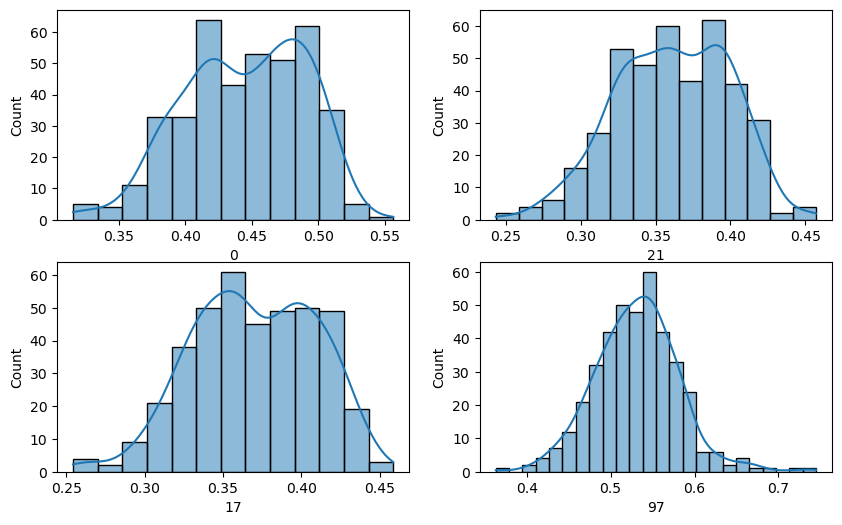

In [117]:
plt.figure(figsize=(10, 6))
plt.subplot(2,2,1)
sns.histplot(X_train['0'], kde=True)
plt.subplot(2,2,2)
sns.histplot(X_train['21'], kde=True)
plt.subplot(2,2,3)
sns.histplot(X_train['17'], kde=True)
plt.subplot(2,2,4)
sns.histplot(X_train['97'], kde=True)

#### Since most of  columns has  bimodal distribution, i prefer to use IQR method for handling outliers and not Z score.

#### Also i will do clipping

In [121]:
X_train[["0", "21", "17", "97"]].describe()

,0,21,17,97
count,400.000000,400.000000,400.000000,400.000000
mean,0.444834,0.361338,0.369920,0.531082
std,0.045258,0.037883,0.039166,0.049897
min,0.315687,0.243458,0.254197,0.363071
25%,0.412293,0.332187,0.341013,0.499333
50%,0.449696,0.361797,0.366832,0.531951
75%,0.483070,0.391707,0.400187,0.560251
max,0.556287,0.457033,0.458647,0.744714


<Axes: ylabel='97'>

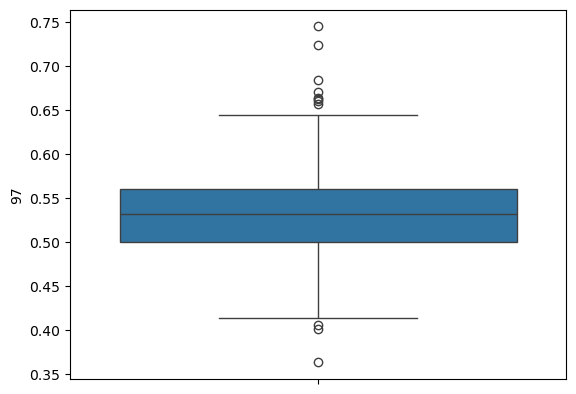

In [122]:
sns.boxplot(X_train["97"])

In [123]:
def q1_calculate(dataframe, column):
    q1 = np.percentile(dataframe[column], 25)
    return q1

def q3_calculate(dataframe, column):
    q3 = np.percentile(dataframe[column], 75)
    return q3

def clipper(dataframe, column, q1, q3):
    iqr = q3 - q1
    lower_range = q1 - (1.5 * iqr)
    upper_range = q3 + (1.5 * iqr)
    dataframe[column] = np.clip(dataframe[column], lower_range, upper_range)


iqr_values = {col: (q1_calculate(X_train, col), q3_calculate(X_train, col)) for col in X_train.columns}

    
# Clipping outliers in X_train   
for col in X_train.columns:
    q1, q3 = iqr_values[col]
    clipper(X_train, col, q1, q3)

# Clipping outliers in X_test
for col in X_test.columns:
    q1, q3 = iqr_values[col]
    clipper(X_test, col, q1, q3)
    

In [124]:
X_train[["0", "21", "17", "97"]].describe()

,0,21,17,97
count,400.000000,400.000000,400.000000,400.000000
mean,0.444834,0.361338,0.369920,0.530589
std,0.045258,0.037883,0.039166,0.047545
min,0.315687,0.243458,0.254197,0.407955
25%,0.412293,0.332187,0.341013,0.499333
50%,0.449696,0.361797,0.366832,0.531951
75%,0.483070,0.391707,0.400187,0.560251
max,0.556287,0.457033,0.458647,0.651629


<Axes: ylabel='97'>

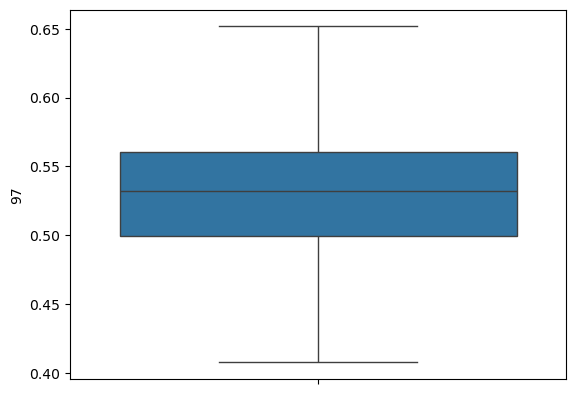

In [125]:
sns.boxplot(X_train["97"])

## PCA

In [128]:
# First applying standard scalar , which makes variance 1 for all columns.

scalar = StandardScaler()
X_train = pd.DataFrame(scalar.fit_transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(scalar.transform(X_test), columns = X_test.columns)

In [130]:
# Now applying PCA

pca = PCA(n_components=4)
X_train = pd.DataFrame(pca.fit_transform(X_train), columns=[f"PC{i+1}" for i in range(pca.n_components_)])
X_test = pd.DataFrame(pca.transform(X_test), columns=[f"PC{i+1}" for i in range(pca.n_components_)])

In [132]:
X_train

,PC1,PC2,PC3,PC4
0,7.800078,-6.734689,-1.323580,4.299359
1,25.125766,2.884451,1.958127,0.528975
2,-31.534630,8.406329,1.338853,-2.057513
3,25.132662,4.989933,1.460895,0.994747
4,11.748299,2.394775,-2.197818,1.834211
...,...,...,...,...
395,-24.813556,3.040657,-2.285761,-2.070797
396,-13.686476,3.062632,0.329258,-1.476256
397,-25.728282,-0.977292,1.783538,-0.281709
398,12.881229,-8.808977,-2.565909,-5.115318


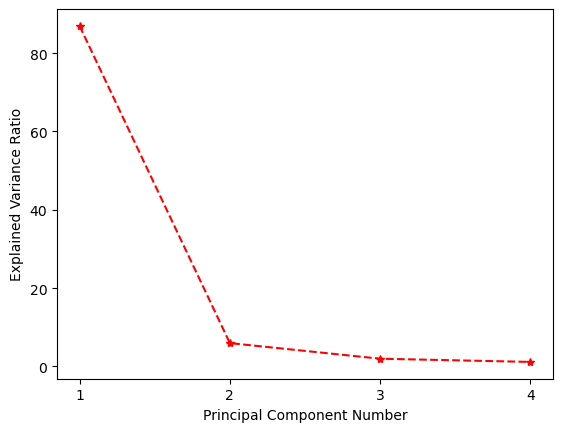

In [133]:
explained_variance = pca.explained_variance_ratio_*100
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='*', linestyle='--', color='r')
plt.xlabel('Principal Component Number')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance) + 1))
plt.show()

In [134]:
# Total explained variance is 96.08 %
# Variance Explained by PC1 is 96.08

print(f"Variance explained by PC1 = {np.round(explained_variance[0],2)}, PC2 = {np.round(explained_variance[1],2)}, PC3 = {np.round(explained_variance[2],2)}, PC4 = {np.round(explained_variance[3], 2)}\n")
print(f"Total explained variance is {np.round(explained_variance.sum(),2)} %")

Variance explained by PC1 = 86.96, PC2 = 5.97, PC3 = 1.99, PC4 = 1.17

Total explained variance is 96.08 %


## Building Model

In [141]:
### Trying Linear regression

lre = LinearRegression()

lre.fit(X_train, y_train)
print(f"train R2 : {lre.score(X_train, y_train)}")
print(f"test R2 : {lre.score(X_test, y_test)}")

train R2 : 0.3566025021985517
test R2 : 0.39024549809731557


In [146]:
scores = cross_val_score(lre, X, y, cv=4)
print(f"R2 : {scores.mean()}")

R2 : -11.64362865052461


#### Linear regression model is not suitable, as it is not able to fit on data i.e underfitting. 

In [149]:
## Applying Decision Tree regression

tree = DecisionTreeRegressor(random_state=42)

# Model training
tree.fit(X_train, y_train)

# MAking prediction
y_pred = tree.predict(X_test)

# Calculating R2 score
score = r2_score(y_test, y_pred)
print(f"R² Score on Test Data: {score:.4f}")
print(f"R² Score on Train Data: {tree.score(X_train, y_train):.4f}")

# Doing cross validation on different folds.
cv_scores = cross_val_score(tree, X_train, y_train, cv=5)
print(f"Cross-validation R² Scores: {cv_scores}")
print(f"Mean CV R² Score: {cv_scores.mean():.4f}")

R² Score on Test Data: 0.1079
R² Score on Train Data: 1.0000
Cross-validation R² Scores: [ 0.15944526  0.91628373  0.92125685 -0.43050529  0.80652677]
Mean CV R² Score: 0.4746


#### As our train R2 is 1 and our test R2 is 0.1 , it strongly suggest that our model is overfitting.Also some of our cross val score are high as some are negative, suggesting our model is sensitive to some folds.